# Filter Processing Wafer Allignment (FPWA)
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

In [2]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *
from functions import *
import imutils

***

### Processing block diagram

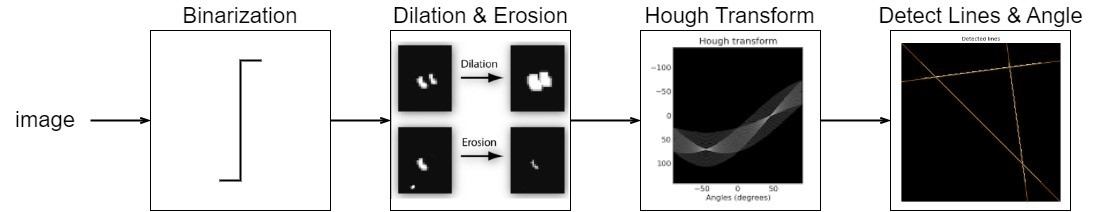

In [3]:
blocks = cv2.imread('imgs/blocks.jpg')
h,w = blocks.shape[:2]
displayImage_fromcv2(img=blocks, w=w, h=h)

***

## Pre-processing

#### Loading test image in grayscale, 8bit pixels

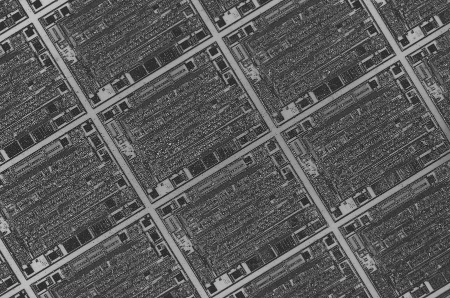

In [4]:
wafer = cv2.imread('imgs/testwafer_1.jpg')
wafer = cv2.cvtColor(wafer, cv2.COLOR_BGR2GRAY).astype(np.uint8)
h,w = wafer.shape[:2]
wafer = cv2.resize(wafer, (w//2, h//2))
h,w = wafer.shape[:2]
displayImage_fromcv2(img=wafer, w=w, h=h)

### Cropping to square aspect ratio and adding two layers of zero padding

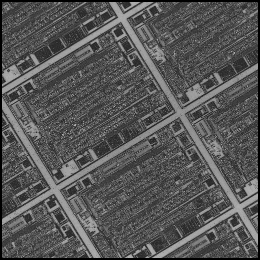

In [6]:
wafer = wafer[h//2-256//2:h//2+256//2,w//2-256//2:w//2+256//2]
wafer = np.pad(wafer, ((2,2),(2,2)))
h,w = wafer.shape[:2]
displayImage_fromcv2(img=wafer, w=w, h=h)
saved = cv2.imwrite(filename="wafer_gray_padded.png", img=wafer)

***
## Processing steps

#### Binarization block

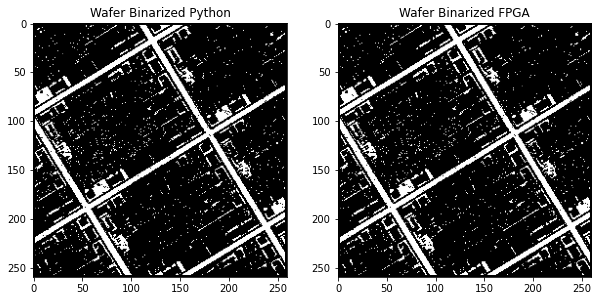

In [7]:
wafer_bin_py = binary_mask(img=wafer, threshold=127)

# wafer_bin_fpga = process_in_fpga(img=wafer, w=w, h=h, baudrate=57600, port='COM3')

for_comparison = {'Wafer Binarized Python':wafer_bin_py,
                  'Wafer Binarized FPGA': wafer_bin_py
                }
compare(for_comparison, size=(10, 8))

saved = cv2.imwrite(filename="wafer_bin_py.png", img=wafer_bin_py)
# saved = cv2.imwrite(filename="wafer_bin_fpga.png", img=wafer_bin_fpga)

#### Dilation and Erosion Blocks

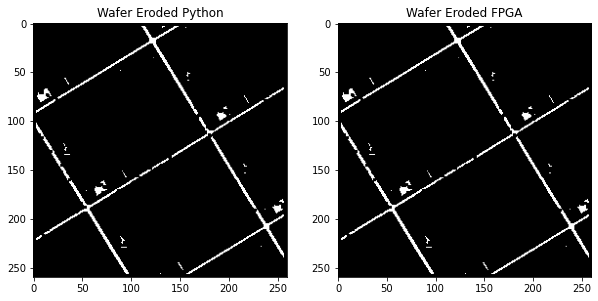

In [8]:
n_erode = 3
kernel_erode = np.ones((n_erode, n_erode), np.uint8)
wafer_eroded_py = cv2.erode(wafer_bin_py, kernel_erode)

# wafer_eroded_fpga = process_in_fpga(img=wafer, w=w, h=h, baudrate=57600, port='COM3')

for_comparison = {'Wafer Eroded Python':wafer_eroded_py,
          'Wafer Eroded FPGA': wafer_eroded_py
        }
compare(for_comparison, size=(10, 8))

saved = cv2.imwrite(filename="wafer_eroded_py.png", img=wafer_eroded_py)
# saved = cv2.imwrite(filename="wafer_eroded_fpga.png", img=wafer_eroded_fpga)

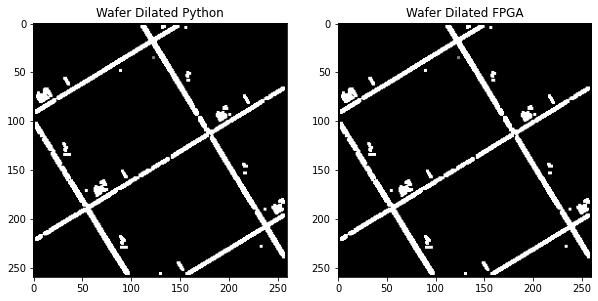

In [9]:
n_dilate = 3
kernel_dilate = np.ones((n_dilate, n_dilate), np.uint8)
wafer_dilated_py = cv2.dilate(wafer_eroded_py, kernel_dilate)

# wafer_dilated_fpga = process_in_fpga(img=wafer, w=w, h=h, baudrate=57600, port='COM3')

for_comparison = {'Wafer Dilated Python':wafer_dilated_py,
          'Wafer Dilated FPGA': wafer_dilated_py
        }
compare(for_comparison, size=(10, 8))

saved = cv2.imwrite(filename="wafer_dilated_py.png", img=wafer_dilated_py)
# saved = cv2.imwrite(filename="wafer_dilated_fpga.png", img=wafer_dilated_fpga)

***

### Hough Transform Block

Angles from Python processing
Angle: -31.17318°
Angle: -121.67598°


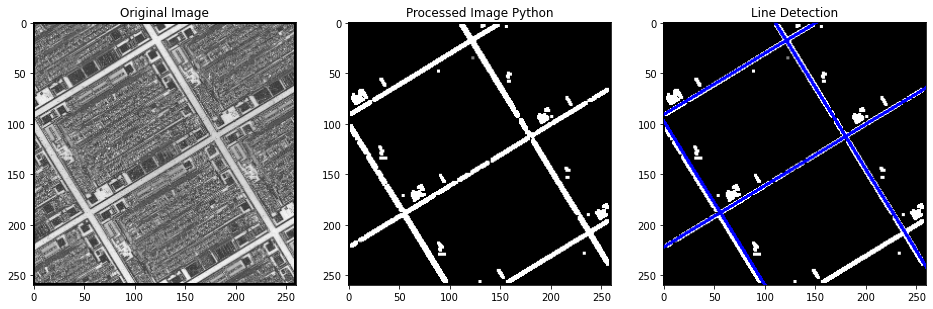

Angles from FPGA processing
Angle: -31.17318°
Angle: -121.67598°


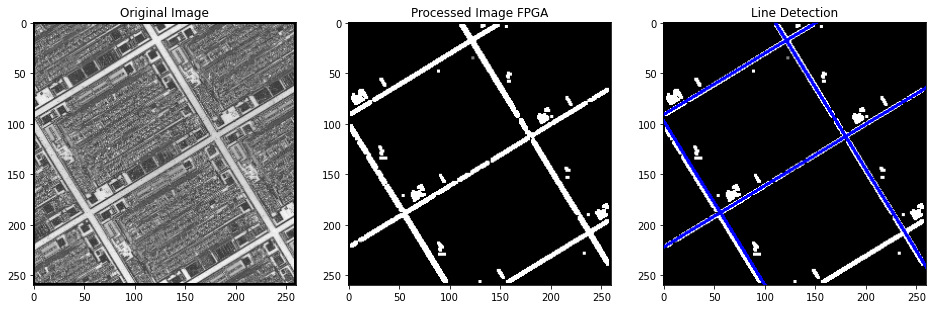

In [10]:
print("Angles from Python processing")
wafer_hough_from_py = hough_transform(img=wafer_dilated_py)

images = {'Original Image':wafer,
          'Processed Image Python':wafer_dilated_py,
          'Line Detection':wafer_hough_from_py
        }

compare(images, size=(16,14))
plt.show()

print("Angles from FPGA processing")
wafer_hough_from_py = hough_transform(img=wafer_dilated_py)
# wafer_hough_from_fpga = hough_transform(img=wafer_dilated_fpga)

images = {'Original Image':wafer,
          'Processed Image FPGA':wafer_dilated_py,
          'Line Detection':wafer_hough_from_py
        }

compare(images, size=(16,14))
plt.show()

saved = cv2.imwrite(filename="wafer_hough_from_py.png", img=wafer_hough_from_py)
# saved = cv2.imwrite(filename="wafer_hough_from_fpga.png", img=wafer_hough_from_fpga)

***

## Rotation and checking

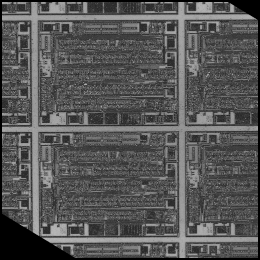

In [15]:
wafer = cv2.imread('imgs/testwafer_1.jpg')
h,w = wafer.shape[:2]
wafer = cv2.cvtColor(wafer, cv2.COLOR_BGR2GRAY).astype(np.uint8)
wafer = imutils.rotate(wafer, angle=-31.17318)
wafer = cv2.resize(wafer, (w//2, h//2))
h,w = wafer.shape[:2]
wafer = wafer[h//2-230//2:h//2+282//2,w//2-256//2:w//2+256//2]
wafer = np.pad(wafer, ((2,2),(2,2)))
h,w = wafer.shape[:2]
displayImage_fromcv2(img=wafer, w=w, h=h)

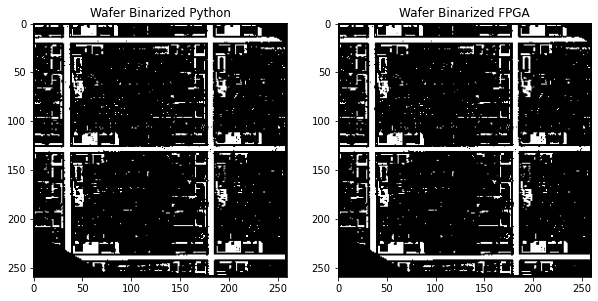

In [16]:
wafer_bin_py = binary_mask(img=wafer, threshold=127)

# wafer_bin_fpga = process_in_fpga(img=wafer, w=w, h=h, baudrate=57600, port='COM3')

for_comparison = {'Wafer Binarized Python':wafer_bin_py,
                  'Wafer Binarized FPGA': wafer_bin_py
                }
compare(for_comparison, size=(10, 8))

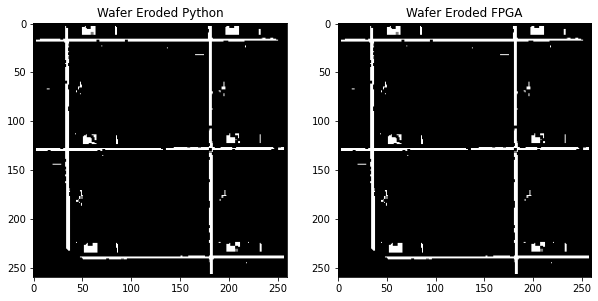

In [17]:
n_erode = 3
kernel_erode = np.ones((n_erode, n_erode), np.uint8)
wafer_eroded_py = cv2.erode(wafer_bin_py, kernel_erode)

# wafer_eroded_fpga = process_in_fpga(img=wafer, w=w, h=h, baudrate=57600, port='COM3')

for_comparison = {'Wafer Eroded Python':wafer_eroded_py,
          'Wafer Eroded FPGA': wafer_eroded_py
        }
compare(for_comparison, size=(10, 8))

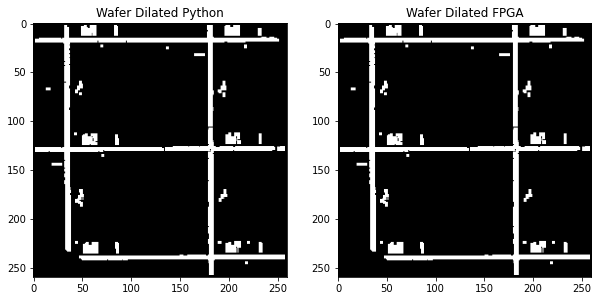

In [18]:
n_dilate = 3
kernel_dilate = np.ones((n_dilate, n_dilate), np.uint8)
wafer_dilated_py = cv2.dilate(wafer_eroded_py, kernel_dilate)

# wafer_dilated_fpga = process_in_fpga(img=wafer, w=w, h=h, baudrate=57600, port='COM3')

for_comparison = {'Wafer Dilated Python':wafer_dilated_py,
          'Wafer Dilated FPGA': wafer_dilated_py
        }
compare(for_comparison, size=(10, 8))

Angles from Python processing
Angle: -90.50279°
Angle: 0.0°


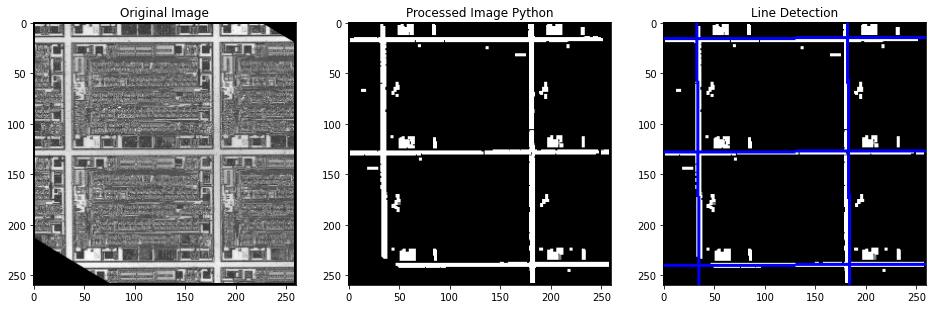

Angles from FPGA processing
Angle: -90.50279°
Angle: 0.0°


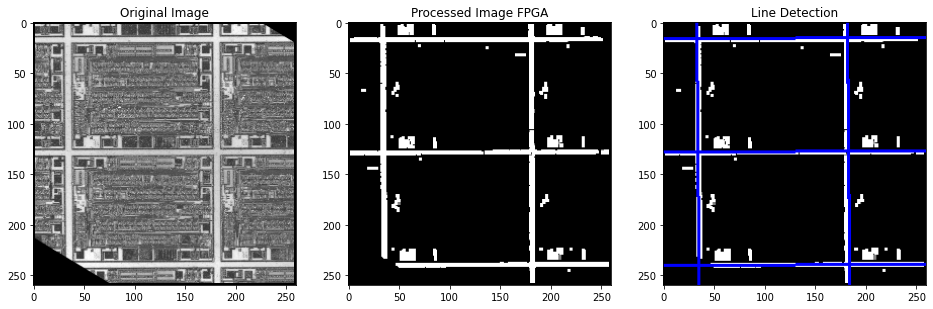

In [19]:
print("Angles from Python processing")
wafer_hough_from_py = hough_transform(img=wafer_dilated_py)

images = {'Original Image':wafer,
          'Processed Image Python':wafer_dilated_py,
          'Line Detection':wafer_hough_from_py
        }

compare(images, size=(16,14))
plt.show()

print("Angles from FPGA processing")
wafer_hough_from_py = hough_transform(img=wafer_dilated_py)
# wafer_hough_from_fpga = hough_transform(img=wafer_dilated_fpga)

images = {'Original Image':wafer,
          'Processed Image FPGA':wafer_dilated_py,
          'Line Detection':wafer_hough_from_py
        }

compare(images, size=(16,14))
plt.show()